In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import datetime
import functions_hiwi as fct

In [2]:
main_dir = r'C:\Users\illic\Python\data_hiwi'

In [3]:
# set paths to specific data
WS100_rtu_path = os.path.join(main_dir, r'WS100_ready_to_use.csv')
WS300_rtu_path = os.path.join(main_dir, r'WS300_ready_to_use.csv')
Raine_rtu_path = os.path.join(main_dir, r'Raine_ready_to_use.csv')
L_pcp_rtu_path = os.path.join(main_dir, r'L_pcp_ready_to_use.csv')

In [4]:
# read data

# read data and convert to utc
WS100_rtu = pd.read_csv(WS100_rtu_path, sep=',', index_col=0) # , skiprows=1
WS100_rtu.index = pd.to_datetime(WS100_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

WS300_rtu = pd.read_csv(WS300_rtu_path, sep=',', index_col=0) # , skiprows=1
WS300_rtu.index = pd.to_datetime(WS300_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

Raine_rtu = pd.read_csv(Raine_rtu_path, sep=',', index_col=0) # , skiprows=1
Raine_rtu.index = pd.to_datetime(Raine_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

L_pcp_rtu = pd.read_csv(L_pcp_rtu_path, sep=',', index_col=0) # , skiprows=1
L_pcp_rtu.index = pd.to_datetime(L_pcp_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

In [5]:
# Ausreißer manuell auf np.nan setzen
WS100_rtu['precipitation.1'][WS100_rtu['precipitation.1'] == WS100_rtu['precipitation.1'].max()] = np.nan

WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan
WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan

L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan
L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan

In [6]:
# precipitation_type für WS100

# 0 = No precipitation
# 60 = Liquid precipitation, e.g. rain
# 70 = Solid precipitation, e.g. snow
# 40 = unspecified precipitation
# (WS401-UMB, WS601-UMB, external
# rain gauge)
# WS100-UMB only:
# 67 = freezing rain
# 69 = sleet
# 90 = hail

In [18]:
WS100_rtu_1M = fct.resampleDf(WS100_rtu, '1M', max_nan=2)

In [120]:
# dataframe = L_pcp_rtu_1M
# column = 'rr_07'
# name = 'rr_07 1M Resample'

# fig, ax = plt.subplots(figsize=(10, 5))

# ax.bar(dataframe.index, dataframe[column], width=20, align='edge')

# ax.set_title(name)
# ax.set_xlabel('DateTime')
# ax.set_ylabel('Precipitation in [mm]')

# timedelta = dataframe.index[2] - dataframe.index[1]

# if timedelta == datetime.timedelta(days=30) or timedelta == datetime.timedelta(days=31) or timedelta == datetime.timedelta(days=28) or timedelta == datetime.timedelta(days=29):
#     plt.xticks(dataframe.index[::3], rotation=45)
# else:
#     plt.xticks(dataframe.index, rotation=45)
    
# plt.yticks(rotation=45)

# plt.show()

In [16]:
WS100_rtu_3M = fct.resampleDf(WS100_rtu, '3M', leave_nan=False)

In [25]:
WS100_rtu_6M = fct.resampleDf(WS100_rtu, '6M', leave_nan=False)

In [13]:
WS100_rtu_1Y = fct.resampleDf(WS100_rtu, '1Y', leave_nan=False)

In [118]:
def balkendiagramm(dataframe, column, name):

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.bar(dataframe.index, dataframe[column], width=20, align='edge')

    ax.set_title(name)
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Precipitation in [mm]')

    timedelta = dataframe.index[2] - dataframe.index[1]

    if timedelta == datetime.timedelta(days=30) or timedelta == datetime.timedelta(days=31) or timedelta == datetime.timedelta(days=28) or timedelta == datetime.timedelta(days=29):
        plt.xticks(dataframe.index[::3], rotation=45)
    else:
        plt.xticks(dataframe.index, rotation=45)

    plt.yticks(rotation=45)

    plt.show()
    
    return

In [79]:
summen_WS100 = pd.concat([WS100_rtu_1M['precipitation.1'], WS100_rtu_3M['precipitation.1'], WS100_rtu_6M['precipitation.1'], WS100_rtu_1Y['precipitation.1']], axis=1)
summen_WS100.columns = ['1M', '3M', '6M', '1Y']
summen_WS100.fillna('', inplace=True)

C:\Users\illic\AppData\Local\Temp\ipykernel_3060\3212098018.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  summen_WS100.fillna('', inplace=True)


In [74]:
# summen_WS100 # bis auf 1M Resample wurden die anderen Resamples mit leave_nan=False gemacht

In [29]:
WS300_rtu_1M = fct.resampleDf(WS300_rtu, '1M', max_nan=2)
WS300_rtu_3M = fct.resampleDf(WS300_rtu, '3M', leave_nan=False)
WS300_rtu_6M = fct.resampleDf(WS300_rtu, '6M', leave_nan=False)
WS300_rtu_1Y = fct.resampleDf(WS300_rtu, '1Y', leave_nan=False)

In [31]:
summen_WS300 = pd.concat([WS300_rtu_1M['precipitation.1'], WS300_rtu_3M['precipitation.1'], WS300_rtu_6M['precipitation.1'], WS300_rtu_1Y['precipitation.1']], axis=1)
summen_WS300.columns = ['1M', '3M', '6M', '1Y']
summen_WS300.fillna('', inplace=True)

C:\Users\illic\AppData\Local\Temp\ipykernel_3060\1589562735.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  summen_WS300.fillna('', inplace=True)


In [33]:
# summen_WS300

In [95]:
Raine_rtu_1M = fct.resampleDf(Raine_rtu, '1M', max_nan=2)
Raine_rtu_3M = fct.resampleDf(Raine_rtu, '3M', leave_nan=False)
Raine_rtu_6M = fct.resampleDf(Raine_rtu, '6M', leave_nan=False)
Raine_rtu_1Y = fct.resampleDf(Raine_rtu, '1Y', leave_nan=False)

In [40]:
summe_Raine = pd.concat([Raine_rtu_1M, Raine_rtu_3M, Raine_rtu_6M, Raine_rtu_1Y], axis=1)
summe_Raine.columns = ['1M', '3M', '6M', '1Y']
summe_Raine.fillna('', inplace=True)

C:\Users\illic\AppData\Local\Temp\ipykernel_3060\3997909560.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  summe_Raine.fillna('', inplace=True)


In [42]:
# summe_Raine

In [43]:
L_pcp_rtu_1M = fct.resampleDf(L_pcp_rtu, '1M', max_nan=2)
L_pcp_rtu_3M = fct.resampleDf(L_pcp_rtu, '3M', leave_nan=False)
L_pcp_rtu_6M = fct.resampleDf(L_pcp_rtu, '6M', leave_nan=False)
L_pcp_rtu_1Y = fct.resampleDf(L_pcp_rtu, '1Y', leave_nan=False)

In [103]:
# L_pcp_rtu_1M

In [63]:
summe_L_pcp = pd.concat([L_pcp_rtu_1M, L_pcp_rtu_3M, L_pcp_rtu_6M, L_pcp_rtu_1Y], axis=1)
# summe_L_pcp.columns = ['', '1M', '', '', '3M', '', '', '6M', '', '', '1Y', '',]
summe_L_pcp.columns = pd.MultiIndex.from_tuples([('', 'rr07'), ('1M', 'rr09'), ('', 'rr10'), 
                                                 ('', 'rr07'), ('3M', 'rr09'), ('', 'rr10'), 
                                                 ('', 'rr07'), ('6M', 'rr09'), ('', 'rr10'), 
                                                 ('', 'rr07'), ('1Y', 'rr09'), ('', 'rr10')])
summe_L_pcp.fillna('', inplace=True)

C:\Users\illic\AppData\Local\Temp\ipykernel_3060\3577445801.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  summe_L_pcp.fillna('', inplace=True)


In [65]:
# summe_L_pcp

In [66]:
summen_alle_Stationen = pd.concat([summen_WS100, summen_WS300, summe_Raine, summe_L_pcp], axis=1)

In [68]:
# summen_alle_Stationen

In [72]:
summen_WS100.to_csv(r'C:\Users\illic\Python\data_hiwi\Summen\summen_WS100.csv', sep=';')
summen_WS300.to_csv(r'C:\Users\illic\Python\data_hiwi\Summen\summen_WS300.csv', sep=';')
summe_Raine.to_csv(r'C:\Users\illic\Python\data_hiwi\Summen\summe_Raine.csv', sep=';')
summe_L_pcp.to_csv(r'C:\Users\illic\Python\data_hiwi\Summen\summe_L_pcp.csv', sep=';')

In [104]:
# Raine_rtu

In [101]:
list_stations_columns = [[WS100_rtu_1M, 'precipitation.1', 'WS100 1M Resample'], 
                         [WS100_rtu_3M, 'precipitation.1', 'WS100 3M Resample'], 
                         [WS100_rtu_6M, 'precipitation.1', 'WS100 6M Resample'], 
                         [WS100_rtu_1Y, 'precipitation.1', 'WS100 1Y Resample'], 
                         [WS300_rtu_1M, 'precipitation.1', 'WS300 1M Resample'], 
                         [WS300_rtu_3M, 'precipitation.1', 'WS300 3M Resample'], 
                         [WS300_rtu_6M, 'precipitation.1', 'WS300 6M Resample'], 
                         [WS300_rtu_1Y, 'precipitation.1', 'WS300 1Y Resample'], 
                         [Raine_rtu_1M, 'Niederschlagsmenge', 'Raine 1M Resample'], 
                         [Raine_rtu_3M, 'Niederschlagsmenge', 'Raine 3M Resample'], 
                         [Raine_rtu_6M, 'Niederschlagsmenge', 'Raine 6M Resample'], 
                         [Raine_rtu_1Y, 'Niederschlagsmenge', 'Raine 1Y Resample'], 
                         [L_pcp_rtu_1M, 'rr_07', 'L_pcp rr_07 1M Resample'], 
                         [L_pcp_rtu_3M, 'rr_07', 'L_pcp rr_07 3M Resample'], 
                         [L_pcp_rtu_6M, 'rr_07', 'L_pcp rr_07 6M Resample'], 
                         [L_pcp_rtu_1Y, 'rr_07', 'L_pcp rr_07 1Y Resample'],  
                         [L_pcp_rtu_1M, 'rr_09', 'L_pcp rr_09 1M Resample'], 
                         [L_pcp_rtu_3M, 'rr_09', 'L_pcp rr_09 3M Resample'], 
                         [L_pcp_rtu_6M, 'rr_09', 'L_pcp rr_09 6M Resample'], 
                         [L_pcp_rtu_1Y, 'rr_09', 'L_pcp rr_09 1Y Resample'], 
                         [L_pcp_rtu_1M, 'rr_10', 'L_pcp rr_10 1M Resample'], 
                         [L_pcp_rtu_3M, 'rr_10', 'L_pcp rr_10 3M Resample'], 
                         [L_pcp_rtu_6M, 'rr_10', 'L_pcp rr_10 6M Resample'], 
                         [L_pcp_rtu_1Y, 'rr_10', 'L_pcp rr_10 1Y Resample']]

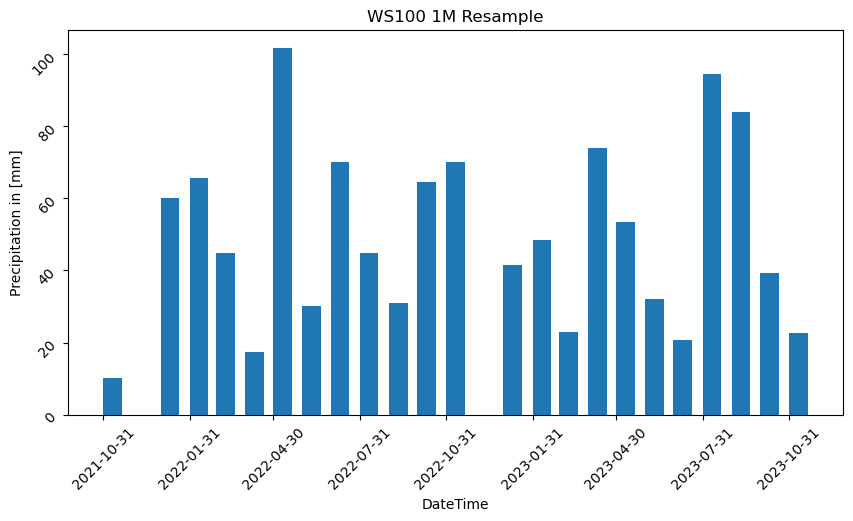

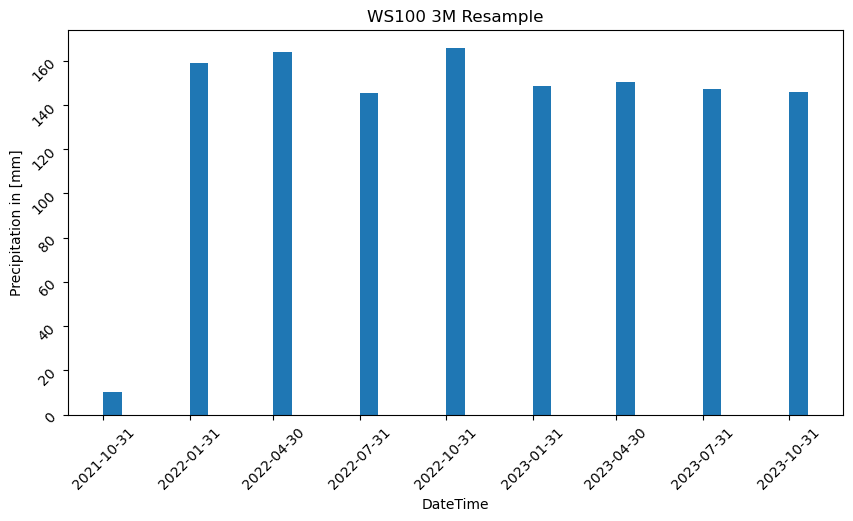

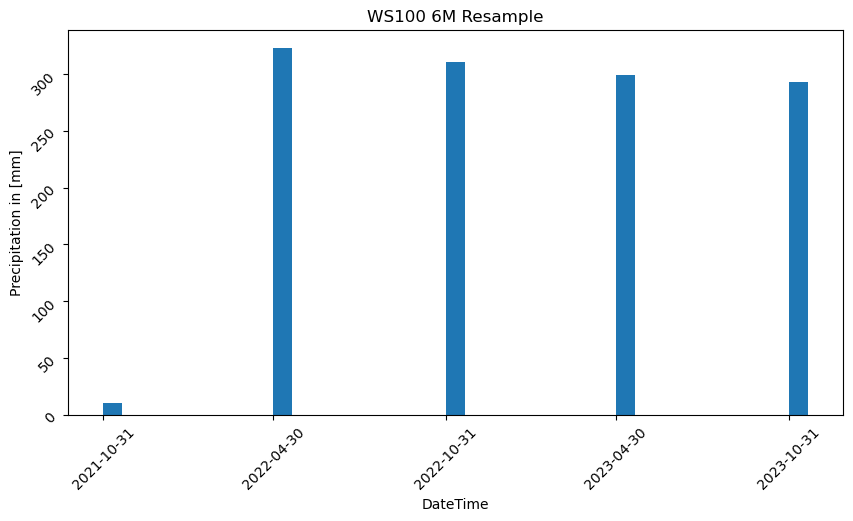

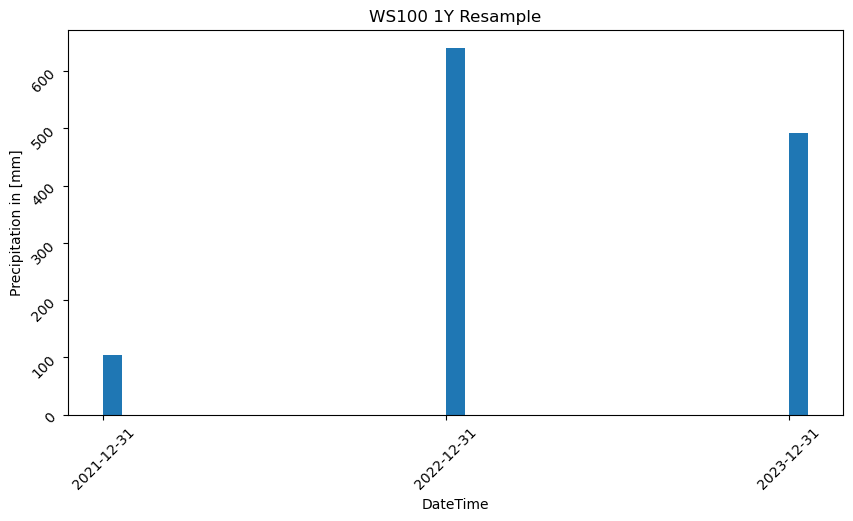

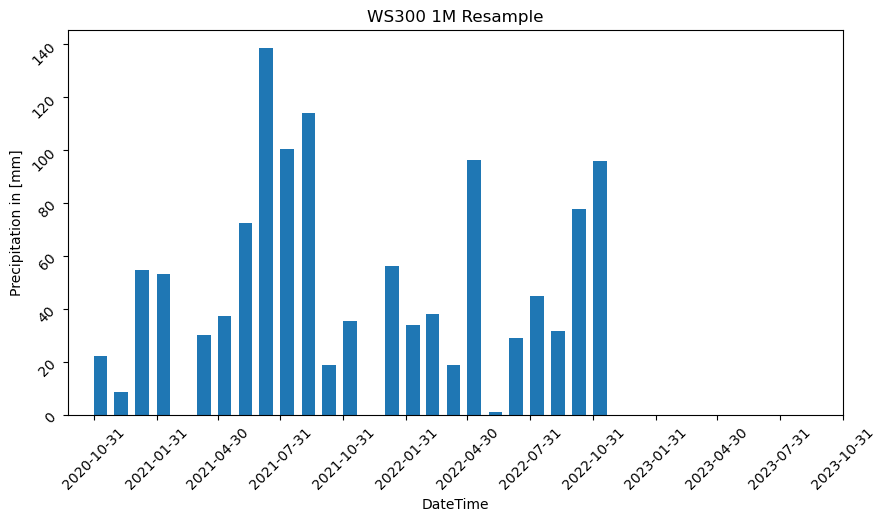

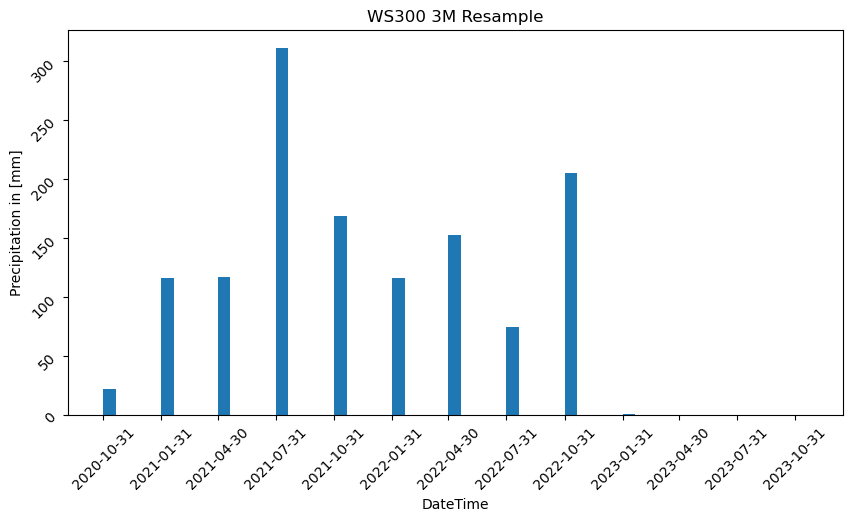

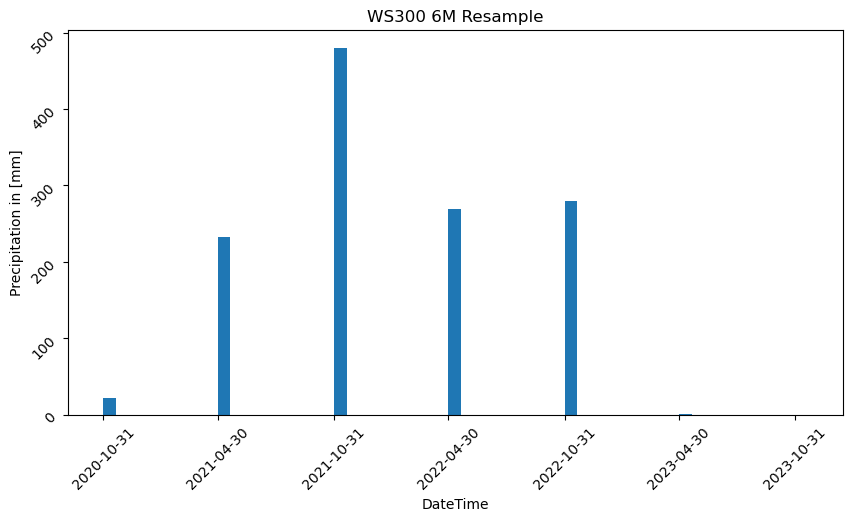

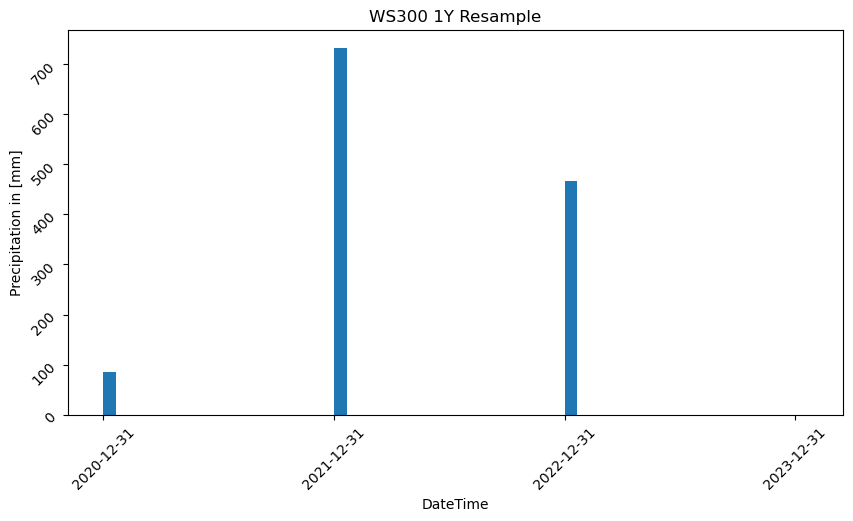

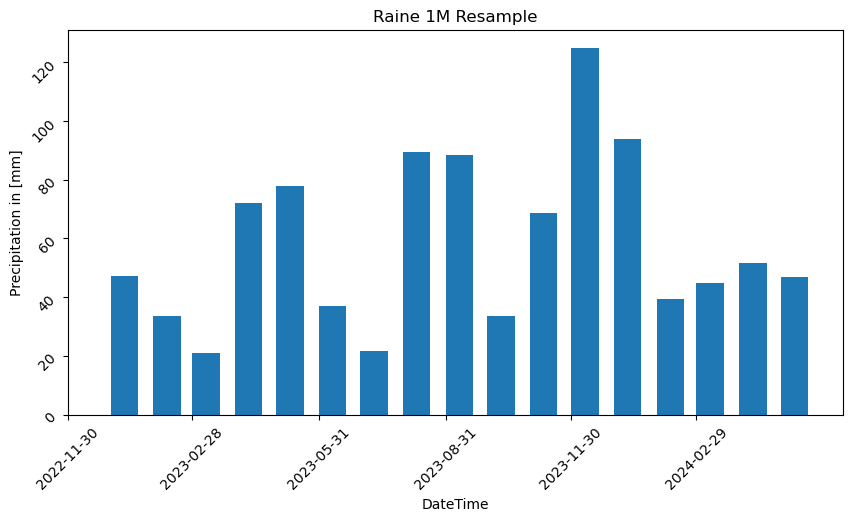

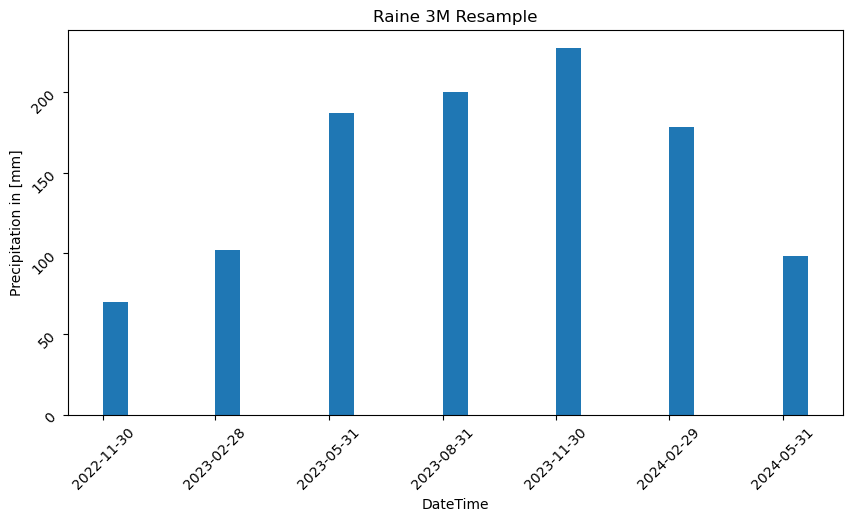

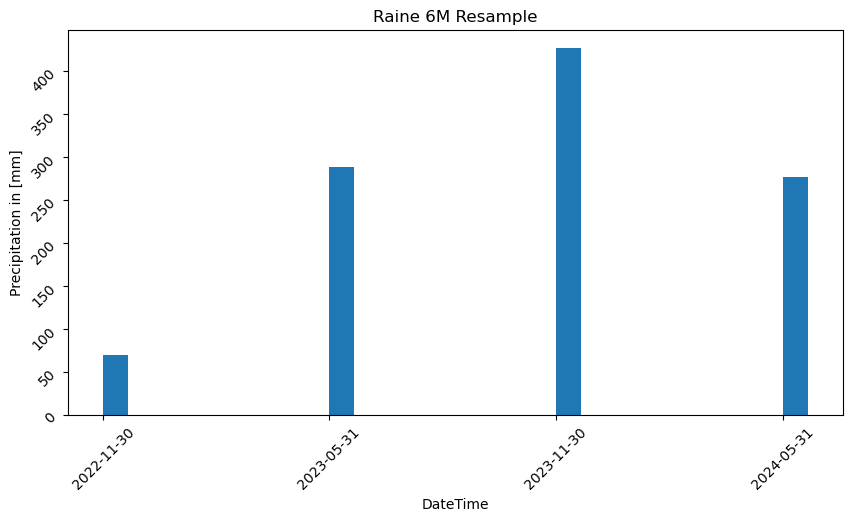

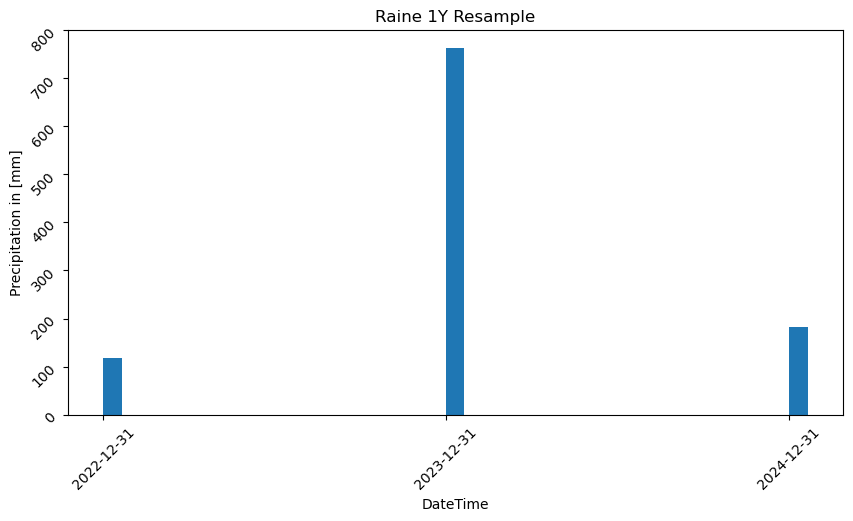

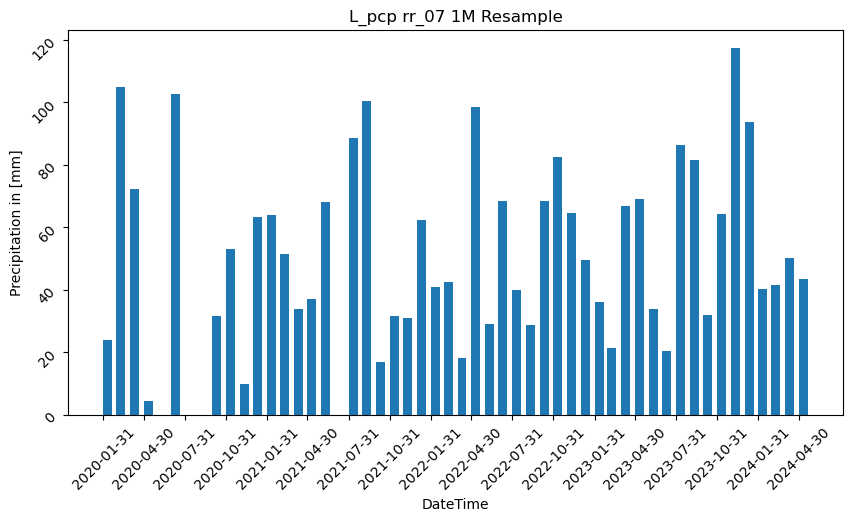

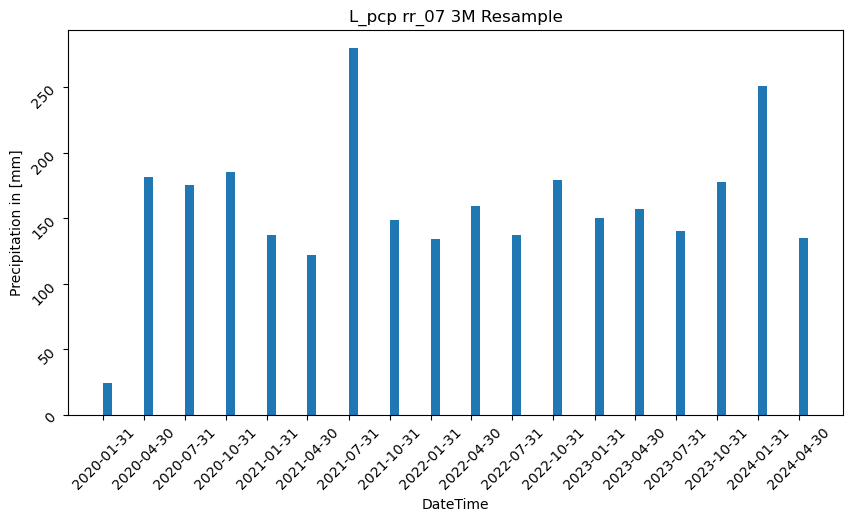

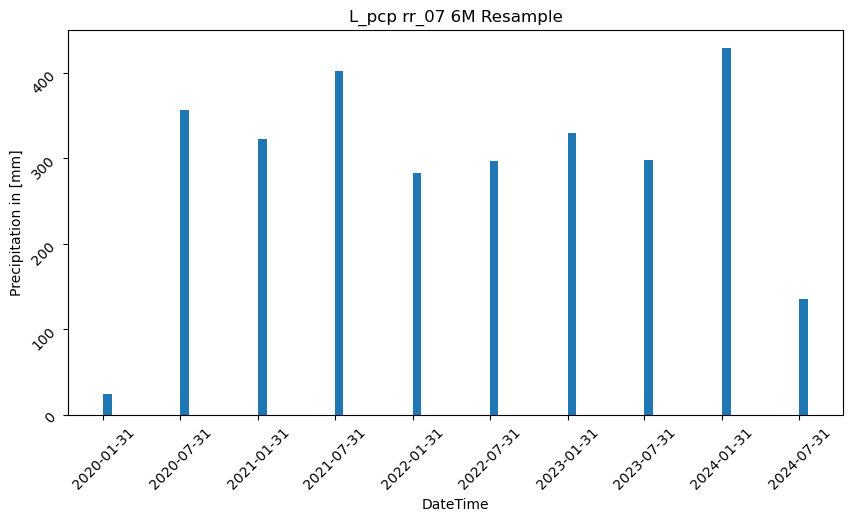

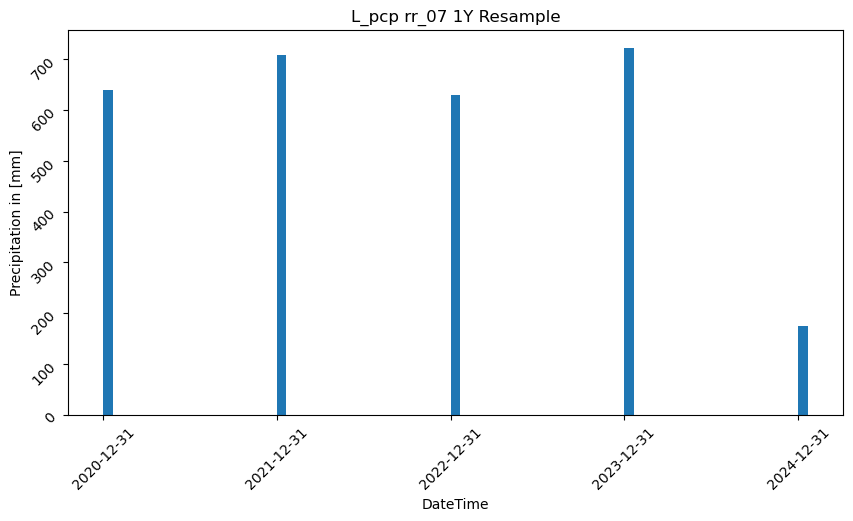

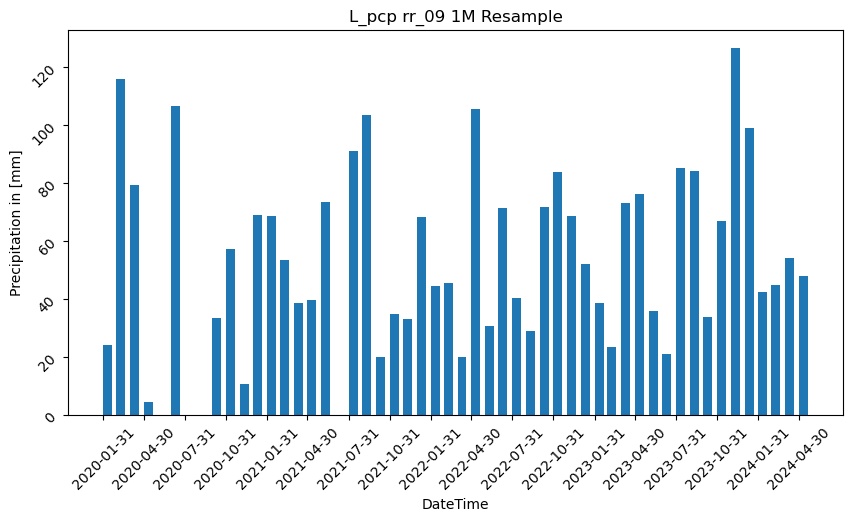

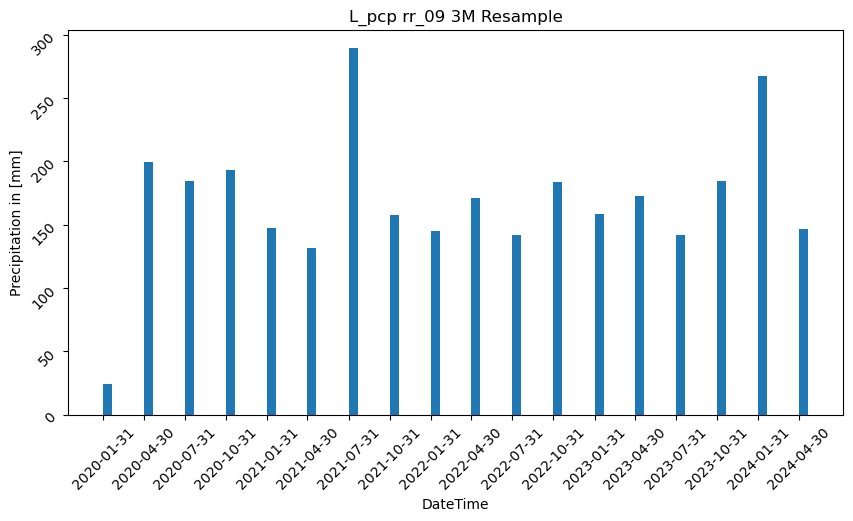

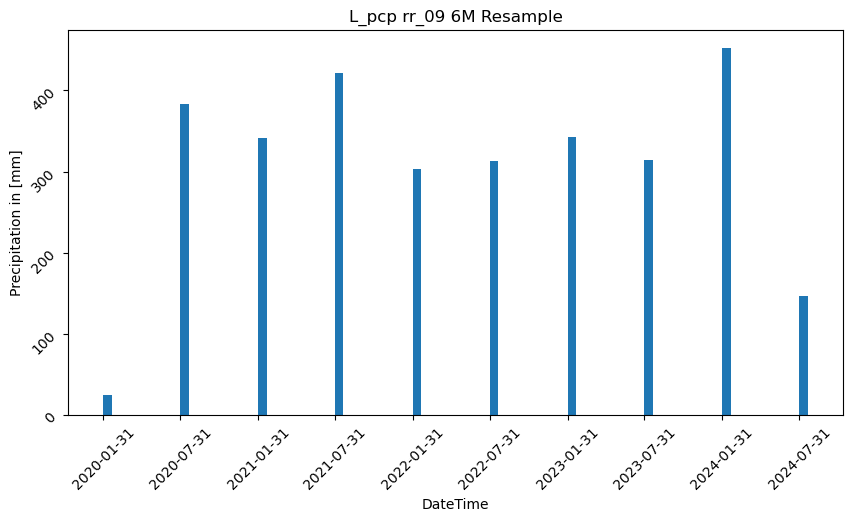

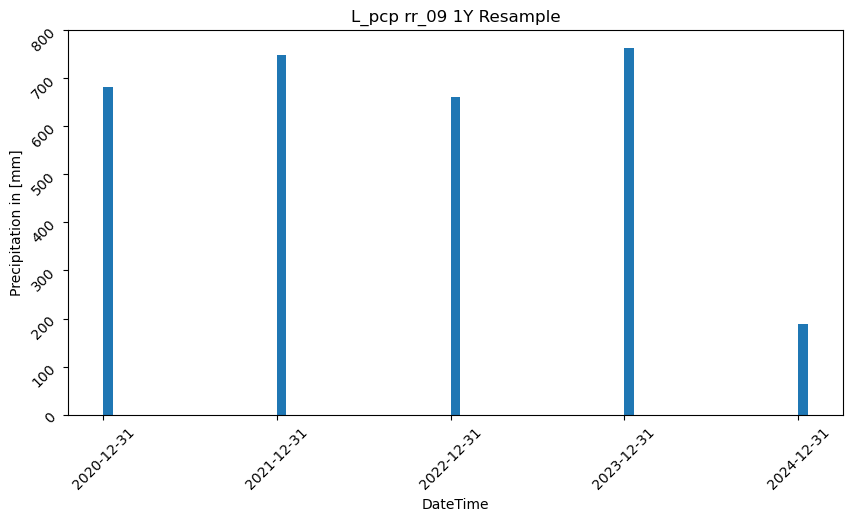

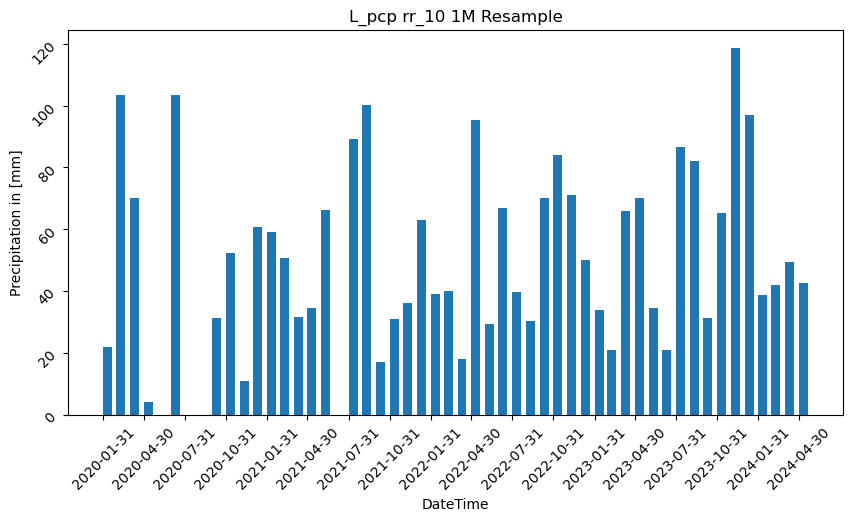

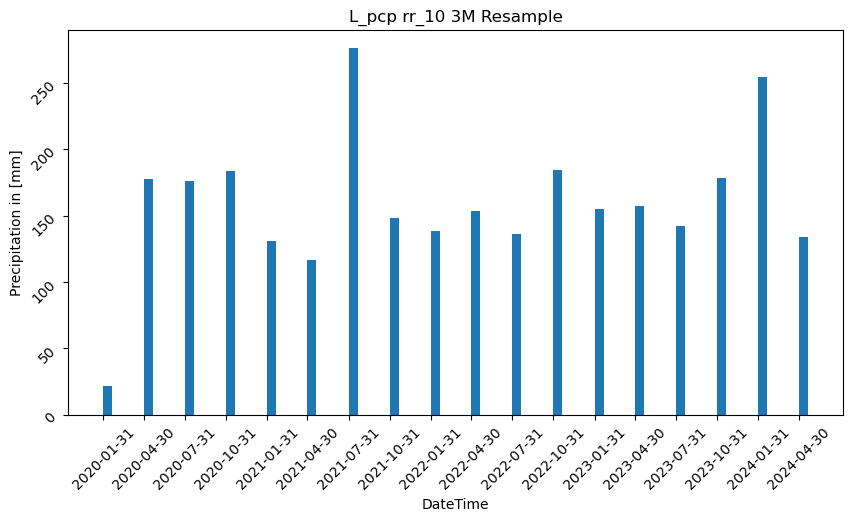

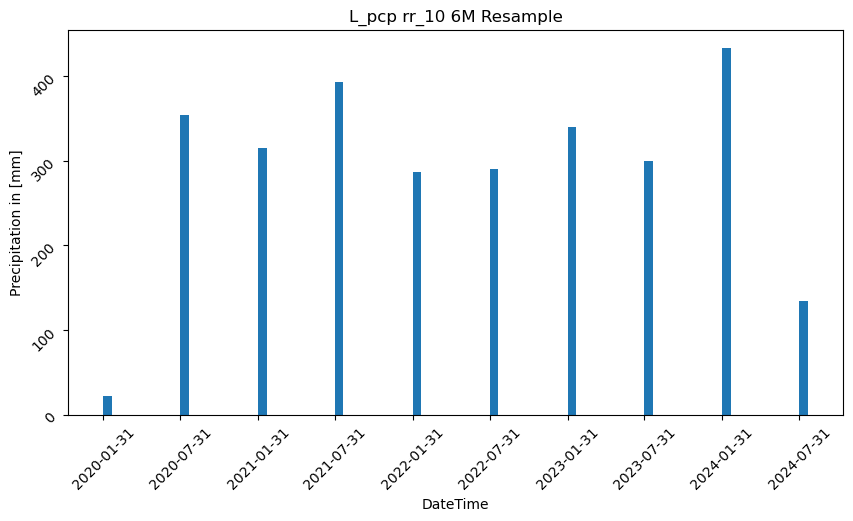

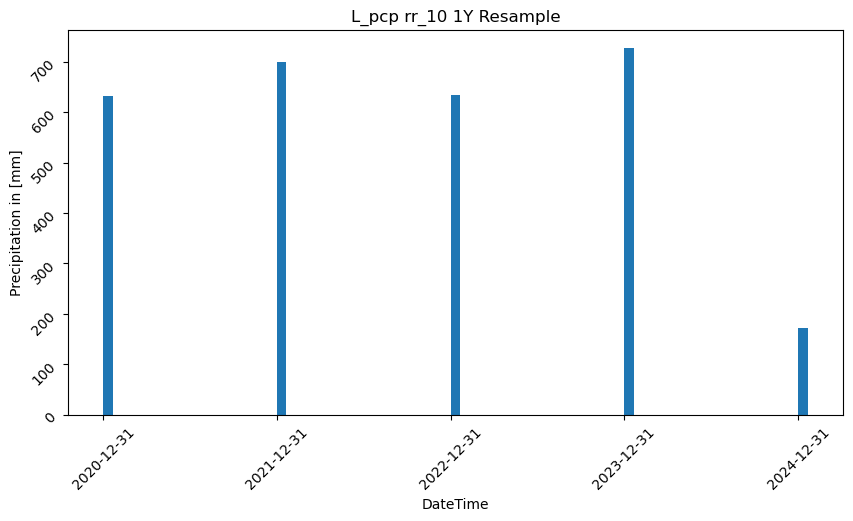

In [119]:
for list in list_stations_columns:
    balkendiagramm(list[0], list[1], list[2])